# Process Data

In [1]:
import pandas as pd
import numpy as np
import os

### Import Data

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
elements_file_path = os.path.join(raw_data_path,'elements.csv')
element_types_file_path = os.path.join(raw_data_path,'element_types.csv')
teams_file_path = os.path.join(raw_data_path,'teams.csv')

In [3]:
elements_df = pd.read_csv(elements_file_path)
element_types_df = pd.read_csv(element_types_file_path)
teams_df = pd.read_csv(teams_file_path)

### Basic Structure

In [4]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            556 non-null    int64  
 1   chance_of_playing_next_round          176 non-null    float64
 2   chance_of_playing_this_round          153 non-null    float64
 3   code                                  556 non-null    int64  
 4   cost_change_event                     556 non-null    int64  
 5   cost_change_event_fall                556 non-null    int64  
 6   cost_change_start                     556 non-null    int64  
 7   cost_change_start_fall                556 non-null    int64  
 8   dreamteam_count                       556 non-null    int64  
 9   element_type                          556 non-null    int64  
 10  ep_next                               556 non-null    float64
 11  ep_this            

In [5]:
elements_df.head()

,Unnamed: 0,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0,NaN,NaN,37605,-1,1,-2,2,0,3,...,550,225,551,226,NaN,NaN,NaN,NaN,NaN,NaN
1,1,75.0,75.0,39476,0,0,-1,1,0,2,...,416,161,459,175,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100.0,100.0,41270,0,0,0,0,0,2,...,512,194,270,93,NaN,NaN,4.0,NaN,NaN,NaN
3,3,NaN,NaN,54694,0,0,-1,1,0,3,...,29,14,35,19,NaN,NaN,6.0,NaN,1.0,NaN
4,4,75.0,75.0,58822,-1,1,-2,2,0,2,...,408,158,453,172,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [7]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.8,68,0,2180,0.0,0
1,Papastathopoulos,1,2,0.1,49,0,9758,0.0,0
2,Luiz Moreira Marinho,1,2,1.0,55,91,13485,0.4,2
3,Aubameyang,1,3,28.7,119,270,241550,1.2,14
4,Soares,1,2,0.3,48,0,1392,0.0,0


In [8]:
element_types_df.head()

,Unnamed: 0,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],59
1,1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],201
2,2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],230
3,3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],66


In [10]:
slim_elements_df.loc[:,'position'] = slim_elements_df.element_type.map(element_types_df.set_index('id').singular_name)

C:\Users\SageMat\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
slim_elements_df.loc[:,'team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\SageMat\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
# remove players with 0 minutes
slim_elements_df = slim_elements_df.loc[slim_elements_df.value_season > 0]

In [20]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
2,Luiz Moreira Marinho,Arsenal,2,1.0,55,91,13485,0.4,2,Defender
3,Aubameyang,Arsenal,3,28.7,119,270,241550,1.2,14,Midfielder
5,Lacazette,Arsenal,4,5.4,85,235,185005,2.5,21,Forward
7,Leno,Arsenal,1,9.2,50,270,207222,2.4,12,Goalkeeper
8,Xhaka,Arsenal,3,0.8,55,226,15981,1.1,6,Midfielder


### Insights

In [21]:
slim_elements_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
262,Bamford,Leeds,4,24.0,58,220,1404619,5.0,29,Forward
250,Castagne,Leicester,2,15.2,57,270,882193,4.7,27,Defender
51,Konsa Ngoyo,Aston Villa,2,3.6,45,180,226110,4.7,21,Defender
46,Mings,Aston Villa,2,3.3,50,180,120143,4.4,22,Defender
188,Calvert-Lewin,Everton,4,37.4,74,248,2025619,4.2,31,Forward
32,Martínez,Aston Villa,1,13.3,46,180,618041,4.1,19,Goalkeeper
76,Maupay,Brighton,4,3.7,65,270,183984,4.0,26,Forward
265,Sousa de Azevedo e Costa,Leeds,3,10.1,56,245,720625,3.9,22,Midfielder
258,Klich,Leeds,3,7.9,56,260,541758,3.8,21,Midfielder
157,Townsend,Crystal Palace,3,3.3,60,270,209739,3.7,22,Midfielder


In [22]:
pivot=slim_elements_df.pivot_table(index='position',values='value_season',aggfunc=np.mean).reset_index()
pivot.sort_values('value_season',ascending=False)

,position,value_season
2,Goalkeeper,1.659091
1,Forward,1.328261
0,Defender,1.314706
3,Midfielder,1.105806


In [25]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value_season',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value_season',ascending=False)

,team,value_season
8,Leeds,1.862500
6,Everton,1.786667
1,Aston Villa,1.768750
9,Leicester,1.688235
2,Brighton,1.593333
5,Crystal Palace,1.576471
0,Arsenal,1.470588
13,Newcastle,1.376471
18,West Ham,1.364706
10,Liverpool,1.277778


In [26]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

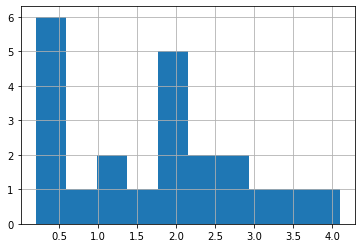

In [28]:
goal_df.value_season.hist()

In [29]:
goal_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
32,Martínez,Aston Villa,1,13.3,46,180,618041,4.1,19,Goalkeeper
373,Darlow,Newcastle,1,1.0,50,270,55279,3.4,17,Goalkeeper
148,Guaita,Crystal Palace,1,4.4,50,270,191261,3.0,15,Goalkeeper
273,Meslier,Leeds,1,2.2,45,270,96365,2.9,13,Goalkeeper
292,Ramses Becker,Liverpool,1,14.0,60,270,179824,2.8,17,Goalkeeper
7,Leno,Arsenal,1,9.2,50,270,207222,2.4,12,Goalkeeper
181,Pickford,Everton,1,9.4,50,270,327002,2.2,11,Goalkeeper
227,Schmeichel,Leicester,1,13.0,55,270,111652,1.8,10,Goalkeeper
78,Ryan,Brighton,1,17.5,45,270,238425,1.8,8,Goalkeeper
425,McCarthy,Southampton,1,18.8,45,270,189127,1.8,8,Goalkeeper


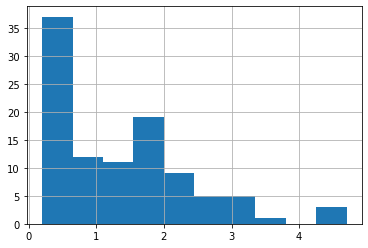

In [31]:
def_df.value_season.hist()

In [32]:
def_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
51,Konsa Ngoyo,Aston Villa,2,3.6,45,180,226110,4.7,21,Defender
250,Castagne,Leicester,2,15.2,57,270,882193,4.7,27,Defender
46,Mings,Aston Villa,2,3.3,50,180,120143,4.4,22,Defender
248,Justin,Leicester,2,22.6,47,270,903299,3.6,17,Defender
27,Magalhães,Arsenal,2,13.1,51,180,708156,3.3,17,Defender
179,Digne,Everton,2,15.5,61,270,592226,3.1,19,Defender
535,Saïss,Wolves,2,11.8,51,270,674319,3.1,16,Defender
138,James,Chelsea,2,16.2,51,270,827333,3.1,16,Defender
180,Keane,Everton,2,4.3,50,270,205301,3.0,15,Defender
295,Robertson,Liverpool,2,13.9,70,270,261922,2.9,20,Defender


In [33]:
mid_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
265,Sousa de Azevedo e Costa,Leeds,3,10.1,56,245,720625,3.9,22,Midfielder
258,Klich,Leeds,3,7.9,56,260,541758,3.8,21,Midfielder
157,Townsend,Crystal Palace,3,3.3,60,270,209739,3.7,22,Midfielder
392,Hendrick,Newcastle,3,4.7,50,253,368358,3.6,18,Midfielder
161,Zaha,Crystal Palace,3,20.2,72,270,959860,3.3,24,Midfielder
454,Son,Spurs,3,21.7,90,225,1044775,3.0,27,Midfielder
521,Bowen,West Ham,3,1.1,63,257,27967,3.0,19,Midfielder
263,Harrison,Leeds,3,2.5,55,270,223884,2.9,16,Midfielder
235,Praet,Leicester,3,0.8,55,224,62467,2.9,16,Midfielder
153,Kouyaté,Crystal Palace,3,0.6,50,270,26226,2.8,14,Midfielder


In [34]:
fwd_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
262,Bamford,Leeds,4,24.0,58,220,1404619,5.0,29,Forward
188,Calvert-Lewin,Everton,4,37.4,74,248,2025619,4.2,31,Forward
76,Maupay,Brighton,4,3.7,65,270,183984,4.0,26,Forward
234,Vardy,Leicester,4,22.8,100,264,643105,3.2,32,Forward
477,Robinson,West Brom,4,0.9,55,214,53515,2.9,16,Forward
190,de Andrade,Everton,4,11.5,80,269,345579,2.8,22,Forward
396,Wilson,Newcastle,4,10.2,64,264,458522,2.8,18,Forward
452,Kane,Spurs,4,17.8,105,263,490739,2.7,28,Forward
428,Ings,Southampton,4,20.0,84,270,315384,2.6,22,Forward
211,Mitrović,Fulham,4,18.8,60,207,371628,2.5,15,Forward
